In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [82]:
train_set = pd.read_csv("train.csv")
macro_set = pd.read_csv("macro.csv")

In [83]:
all_data = train_set.merge(macro_set, on=["timestamp"])
all_data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9


Обработка отсутсвующих значений

In [84]:
all_data.isnull().sum()

id                                 0
timestamp                          0
full_sq                            0
life_sq                         6383
floor                            167
                               ...  
bandwidth_sports                   0
population_reg_sports_share     3239
students_reg_sports_share      16901
apartment_build                 3239
apartment_fund_sqm                 0
Length: 391, dtype: int64

In [85]:
missing_data = all_data[all_data.isnull().any(axis=1)]

In [86]:
missing_data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9


In [87]:
# обработка отсутствующих значений относительно соседних
all_data_interpolated = all_data.interpolate()

missing_data = all_data_interpolated[all_data_interpolated.isnull().any(axis=1)]
#missing_data

In [88]:
# Удаление строк с отсутствующими значениями
all_data_interpolated.dropna(inplace=True)

In [89]:
all_data_interpolated

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
8056,8059,2013-05-21,11,11.000000,2.0,5.000000,2.000000,1907.000000,1.000000,12.000000,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8057,8060,2013-05-22,45,11.500000,1.0,5.309091,2.036364,1907.924051,1.036364,11.781818,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8058,8061,2013-05-22,68,12.000000,2.0,5.618182,2.072727,1908.848101,1.072727,11.563636,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8059,8062,2013-05-22,68,12.500000,2.0,5.927273,2.109091,1909.772152,1.109091,11.345455,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8060,8063,2013-05-22,21,13.000000,7.0,6.236364,2.145455,1910.696203,1.145455,11.127273,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27227,27230,2014-12-31,44,40.666667,12.0,1.000000,1.000000,1992.000000,1.000000,1.000000,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
27228,27231,2014-12-31,76,45.000000,6.0,16.000000,1.000000,2001.000000,3.000000,10.000000,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
27229,27232,2014-12-31,78,43.000000,15.0,17.000000,1.000000,2002.000000,3.000000,13.000000,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
27230,27233,2014-12-31,54,28.000000,7.0,16.000000,5.000000,1975.000000,2.000000,12.000000,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8


Поиск аномалий

In [90]:
data_anml = all_data_interpolated.copy().select_dtypes(exclude=['object'])
data_anml

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
8056,8059,11,11.000000,2.0,5.000000,2.000000,1907.000000,1.000000,12.000000,3.0,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8057,8060,45,11.500000,1.0,5.309091,2.036364,1907.924051,1.036364,11.781818,3.0,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8058,8061,68,12.000000,2.0,5.618182,2.072727,1908.848101,1.072727,11.563636,3.0,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8059,8062,68,12.500000,2.0,5.927273,2.109091,1909.772152,1.109091,11.345455,3.0,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8060,8063,21,13.000000,7.0,6.236364,2.145455,1910.696203,1.145455,11.127273,3.0,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27227,27230,44,40.666667,12.0,1.000000,1.000000,1992.000000,1.000000,1.000000,1.0,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
27228,27231,76,45.000000,6.0,16.000000,1.000000,2001.000000,3.000000,10.000000,4.0,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
27229,27232,78,43.000000,15.0,17.000000,1.000000,2002.000000,3.000000,13.000000,3.0,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
27230,27233,54,28.000000,7.0,16.000000,5.000000,1975.000000,2.000000,12.000000,3.0,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8


In [91]:
# Поиск аномалий среди всех признаков
def outlier_std(data, col, threshold=3):
  mean = data[col].mean()
  std = data[col].std()

  low_bound = mean - threshold * std
  up_bound = mean + threshold * std

  anmls = pd.concat([data[col] > up_bound, data[col] < low_bound], axis=1).any(axis=1)
  return anmls, up_bound, low_bound

anl, u, l =  outlier_std(data_anml, data_anml.drop(["id"], axis=1).columns)
anl

8056     True
8057     True
8058     True
8059     True
8060     True
         ... 
27227    True
27228    True
27229    True
27230    True
27231    True
Length: 19176, dtype: bool

In [92]:
# Делаем таблицу из столбцов, в которых были аномалии и выбросы
def get_col_outliers(data, function=outlier_std, threshold=3):
  outliers = pd.Series(data=[False] * len(data), index=data.index, name="is_outlier")

  cmpr_table = {}

  for col in data.columns:
    anmls, up_bound, low_bound = function(data, col, threshold=threshold)
    cmpr_table[col] = [up_bound, low_bound, sum(anmls), 100*sum(anmls)/len(anmls)]
    outliers.loc[anmls[anmls].index] = True

  cmpr_table = pd.DataFrame(cmpr_table).T
  cmpr_table.columns = ["upper_bound", "lower_bound", "anomalies_count", "anomalies_percent"]
  return cmpr_table, outliers

compr_table, std_outliers = get_col_outliers(data_anml.drop(["id"], axis=1))

In [93]:
compr_table

,upper_bound,lower_bound,anomalies_count,anomalies_percent
full_sq,119.343524,-11.668827,262.0,1.366291
life_sq,207.384273,-138.417283,17.0,0.088652
floor,23.537261,-8.328980,173.0,0.902169
max_floor,32.357524,-7.344747,53.0,0.276387
material,6.165376,-2.507940,0.0,0.000000
...,...,...,...,...
bandwidth_sports,472415.022622,284746.265864,0.0,0.000000
population_reg_sports_share,29.805517,25.731842,0.0,0.000000
students_reg_sports_share,76.200000,76.200000,0.0,0.000000
apartment_build,46527.559262,45788.866270,0.0,0.000000


In [94]:
#compr_table.sort_values(by=["anomalies_count"], ascending=False)

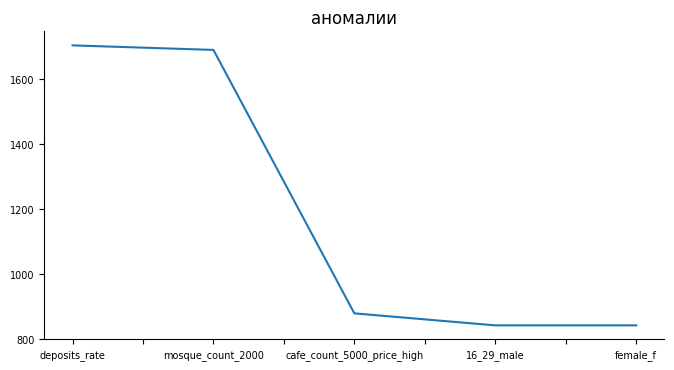

In [95]:
# Визуализаци на графике количества аномалий для признака
plt.figure(figsize=(15, 10))

plt.gca().tick_params(axis='x', labelsize=7)
plt.gca().tick_params(axis='y', labelsize=7)

compr_table.sort_values(by=["anomalies_count"], ascending=False)["anomalies_count"].iloc[:5].plot(kind='line', figsize=(8, 4), title='аномалии')
plt.gca().spines[['top', 'right']].set_visible(False)

In [96]:
compr_table.sort_values(by="anomalies_count", ascending=False)

,upper_bound,lower_bound,anomalies_count,anomalies_percent
deposits_rate,1.197865e+01,5.074745e-02,1705.0,8.891322
mosque_count_2000,9.388885e-01,-7.625222e-01,1691.0,8.818315
cafe_count_5000_price_high,1.776763e+01,-1.430632e+01,880.0,4.589070
16_29_male,1.043092e+05,-7.277013e+04,843.0,4.396120
female_f,5.454332e+05,-3.830984e+05,843.0,4.396120
...,...,...,...,...
deposits_value,1.893868e+07,1.462135e+07,0.0,0.000000
micex,1.642760e+03,1.227434e+03,0.0,0.000000
average_provision_of_build_contract_moscow,6.982219e+00,5.756433e+00,0.0,0.000000
average_provision_of_build_contract,6.716338e+00,5.678382e+00,0.0,0.000000


Удаление строк с аномальными значениями и выбросами

In [97]:
data_cleaned = all_data_interpolated[~std_outliers].copy()
data_cleaned

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
8278,8281,2013-06-01,63,22.000000,15.0,12.428571,1.000000,2005.857143,2.285714,6.714286,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8289,8292,2013-06-03,82,43.666667,11.0,9.000000,1.666667,1966.666667,2.333333,8.000000,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8293,8296,2013-06-03,38,19.000000,17.0,17.000000,1.000000,1986.000000,1.000000,8.000000,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8295,8298,2013-06-03,14,14.000000,1.0,16.352941,1.058824,1985.087719,1.058824,8.235294,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
8301,8304,2013-06-04,57,57.000000,13.0,14.411765,1.235294,1982.350877,1.235294,8.941176,...,271.0,9350.0,627.0,0.43939,1440.0,329348.0,26.7,76.2,46352.0,226047.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25519,25522,2014-11-29,61,38.000000,4.0,9.000000,1.000000,1972.000000,3.000000,7.000000,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
25520,25523,2014-11-29,38,36.000000,13.0,17.000000,1.000000,1965.000000,1.000000,1.000000,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
25523,25526,2014-11-29,45,18.000000,5.0,5.000000,1.000000,1965.000000,2.000000,5.000000,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8
25524,25527,2014-11-29,27,27.000000,21.0,22.000000,6.000000,2015.000000,1.000000,10.000000,...,271.0,10311.0,627.0,0.44784,1440.0,398451.0,28.2,76.2,46080.0,229294.8


In [98]:
train_data = data_cleaned.copy()

Корреляция между признаками

In [99]:
#train_data.corr(numeric_only=True)

<Axes: >

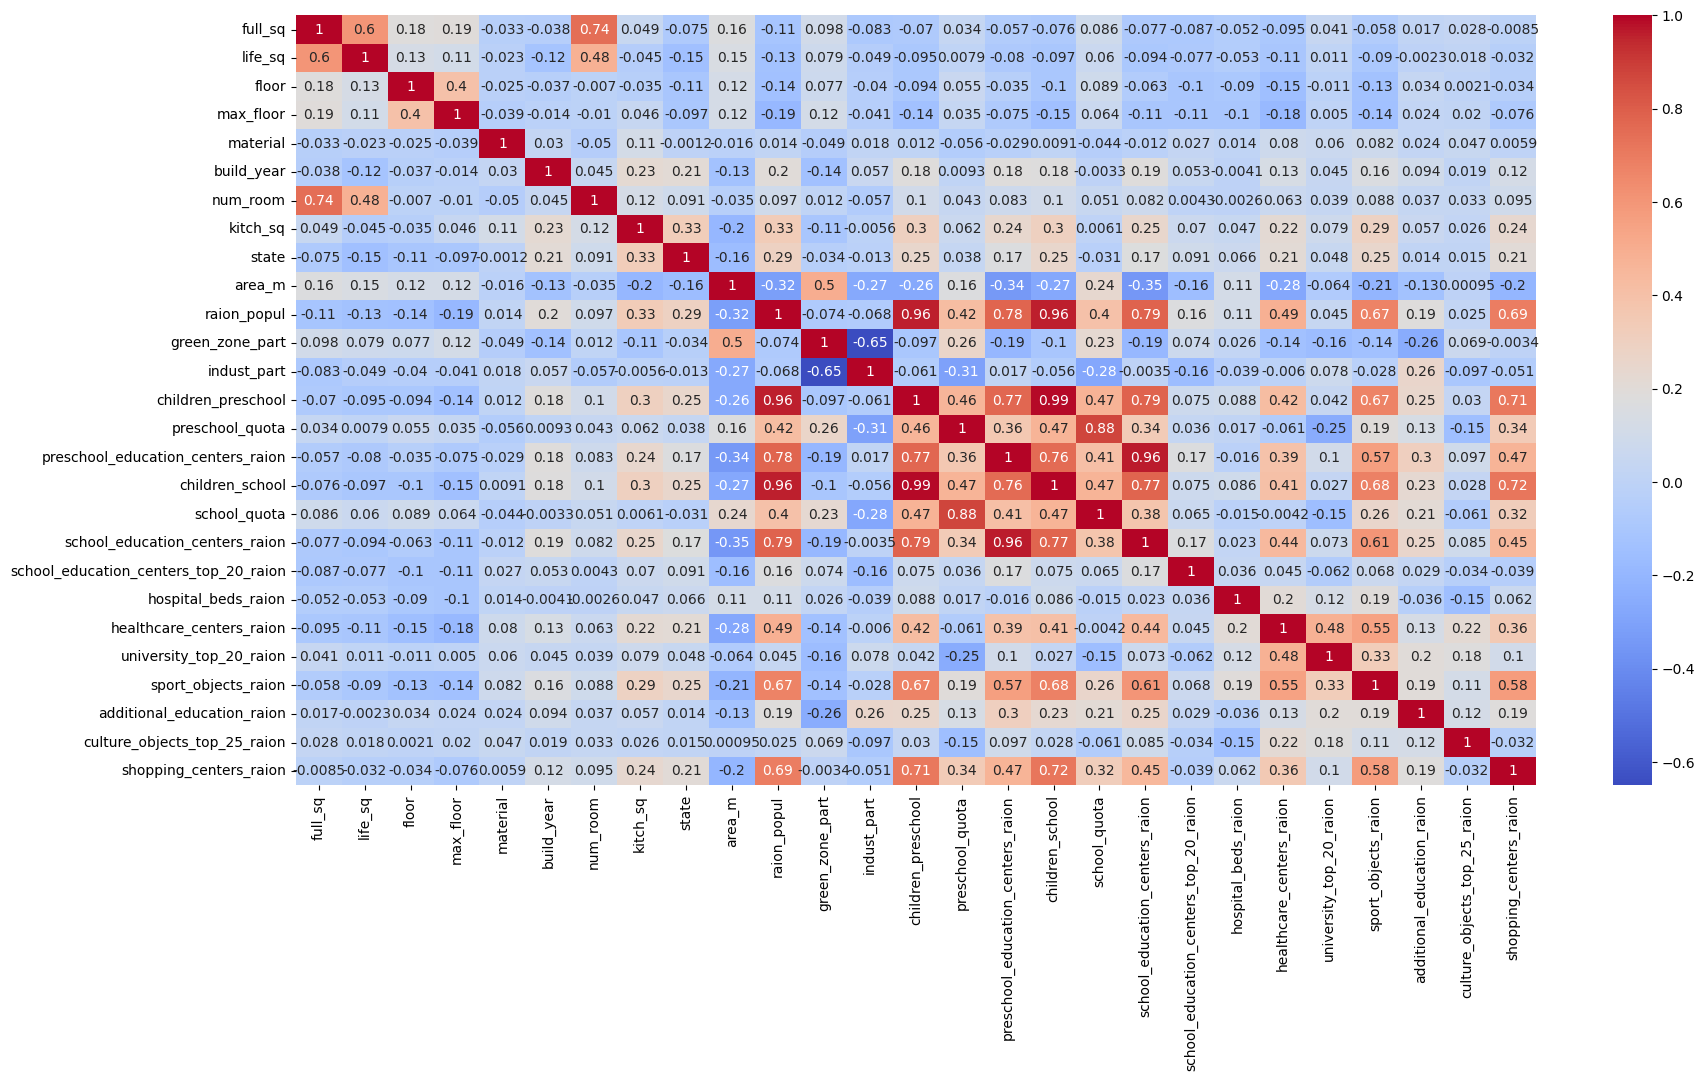

In [100]:
# Отображение корреляции между некоторыми признаками
corr = train_data.drop(["id", "timestamp"], axis=1).iloc[:,:30].corr(numeric_only=True)

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [101]:
#корреляция между ценой недвижимости и остальными признаками

corr_price_doc = all_data.drop(["id", "timestamp"], axis=1).corr(numeric_only=True).abs()["price_doc"].sort_values(ascending=True)
#corr_price_doc

In [102]:
corr_price_doc.sort_values(ascending=True)

trc_sqm_500                          0.000374
divorce_rate                         0.000385
build_year                           0.002161
cafe_sum_3000_max_price_avg          0.002200
balance_trade                        0.003161
                                       ...   
sport_count_5000                     0.294864
full_sq                              0.341840
num_room                             0.476337
price_doc                            1.000000
provision_retail_space_modern_sqm         NaN
Name: price_doc, Length: 371, dtype: float64

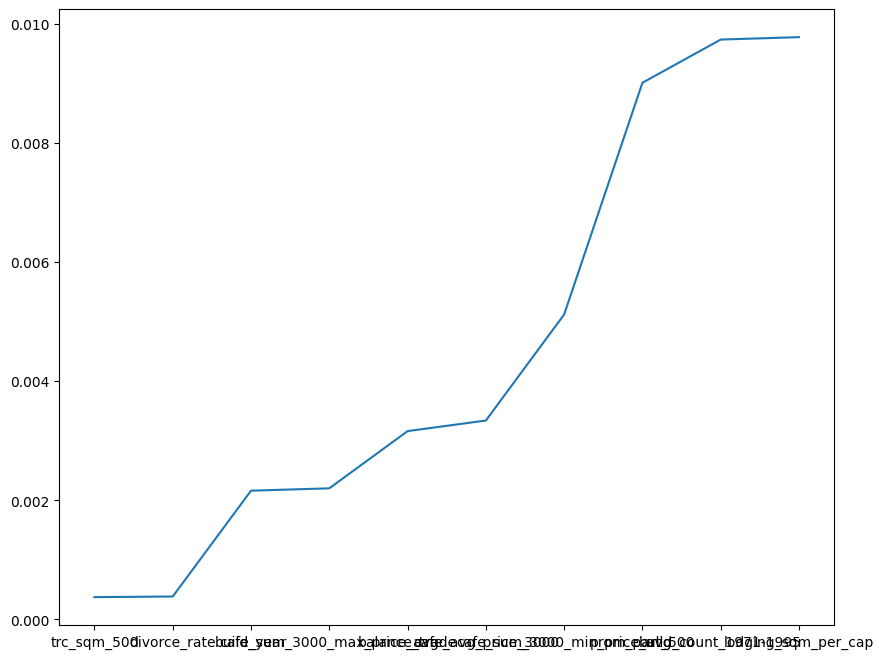

In [103]:
# Отображение корреляции между некоторыми из признаков и целевой переменной
plt.figure(figsize=(10, 8))
plt.plot(corr_price_doc.drop(["price_doc"]).iloc[:10])

Приведение строковых признаков к числовым

In [104]:
# Поиск всех столбцов со строковыми значениями
str_col = train_data.select_dtypes(include=[object])

In [105]:
#str_col.nunique()

In [106]:
str_col.drop(["timestamp"], axis=1, inplace=True)
for column in str_col:
    train_data = pd.concat([train_data, pd.get_dummies(train_data[column], prefix=column)], axis=1)
    train_data.drop(column, axis=1, inplace=True)

In [107]:
train_data

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,ecology_good,ecology_no data,ecology_poor,ecology_satisfactory,"child_on_acc_pre_school_16,765","child_on_acc_pre_school_3,013","modern_education_share_90,92","modern_education_share_93,08","old_education_build_share_23,14","old_education_build_share_25,47"
8278,8281,2013-06-01,63,22.000000,15.0,12.428571,1.000000,2005.857143,2.285714,6.714286,...,1,0,0,0,0,1,1,0,1,0
8289,8292,2013-06-03,82,43.666667,11.0,9.000000,1.666667,1966.666667,2.333333,8.000000,...,0,1,0,0,0,1,1,0,1,0
8293,8296,2013-06-03,38,19.000000,17.0,17.000000,1.000000,1986.000000,1.000000,8.000000,...,0,0,1,0,0,1,1,0,1,0
8295,8298,2013-06-03,14,14.000000,1.0,16.352941,1.058824,1985.087719,1.058824,8.235294,...,0,0,0,0,0,1,1,0,1,0
8301,8304,2013-06-04,57,57.000000,13.0,14.411765,1.235294,1982.350877,1.235294,8.941176,...,0,1,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25519,25522,2014-11-29,61,38.000000,4.0,9.000000,1.000000,1972.000000,3.000000,7.000000,...,0,0,1,0,1,0,0,1,0,1
25520,25523,2014-11-29,38,36.000000,13.0,17.000000,1.000000,1965.000000,1.000000,1.000000,...,0,1,0,0,1,0,0,1,0,1
25523,25526,2014-11-29,45,18.000000,5.0,5.000000,1.000000,1965.000000,2.000000,5.000000,...,0,0,1,0,1,0,0,1,0,1
25524,25527,2014-11-29,27,27.000000,21.0,22.000000,6.000000,2015.000000,1.000000,10.000000,...,1,0,0,0,1,0,0,1,0,1


Сбалансированность данных

коэффициент асимметрии: 3.9482878974423765
эксцесс: 31.397085228301677


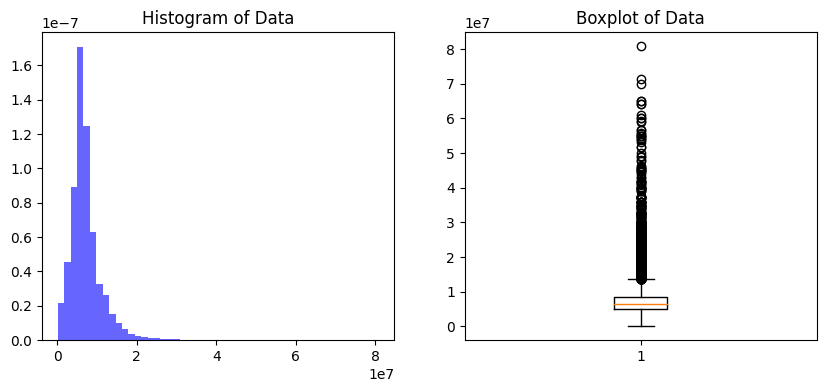

In [108]:
from scipy.stats import skew, kurtosis

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(all_data_interpolated["price_doc"], bins=50, density=True, alpha=0.6, color='blue')
plt.title('Histogram of Data')

# Вычисляем коэффициент асимметрии и эксцесс
skewness = skew(all_data_interpolated["price_doc"])
kurt = kurtosis(all_data_interpolated["price_doc"])

print("коэффициент асимметрии:", skewness)
print("эксцесс:", kurt)

plt.subplot(1, 2, 2)
plt.boxplot(all_data_interpolated["price_doc"])
plt.title('Boxplot of Data')

plt.show()

# Видны пики на графиках и высокие значаения коэффициента асимметрии и эксцесса до баланасировки целевой переменной

коэффициент асимметрии: 1.0665863409221534
эксцесс: 2.1955485663685925


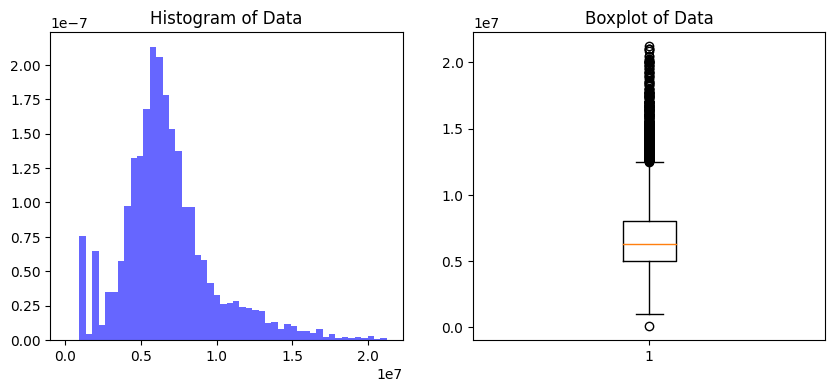

In [109]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(train_data["price_doc"], bins=50, density=True, alpha=0.6, color='blue')
plt.title('Histogram of Data')

# Вычисляем коэффициент асимметрии и эксцесс
skewness = skew(train_data["price_doc"])
kurt = kurtosis(train_data["price_doc"])

print("коэффициент асимметрии:", skewness)
print("эксцесс:", kurt)

plt.subplot(1, 2, 2)
plt.boxplot(train_data["price_doc"])
plt.title('Boxplot of Data')

plt.show()
# Значения после балансировки целевой переменной

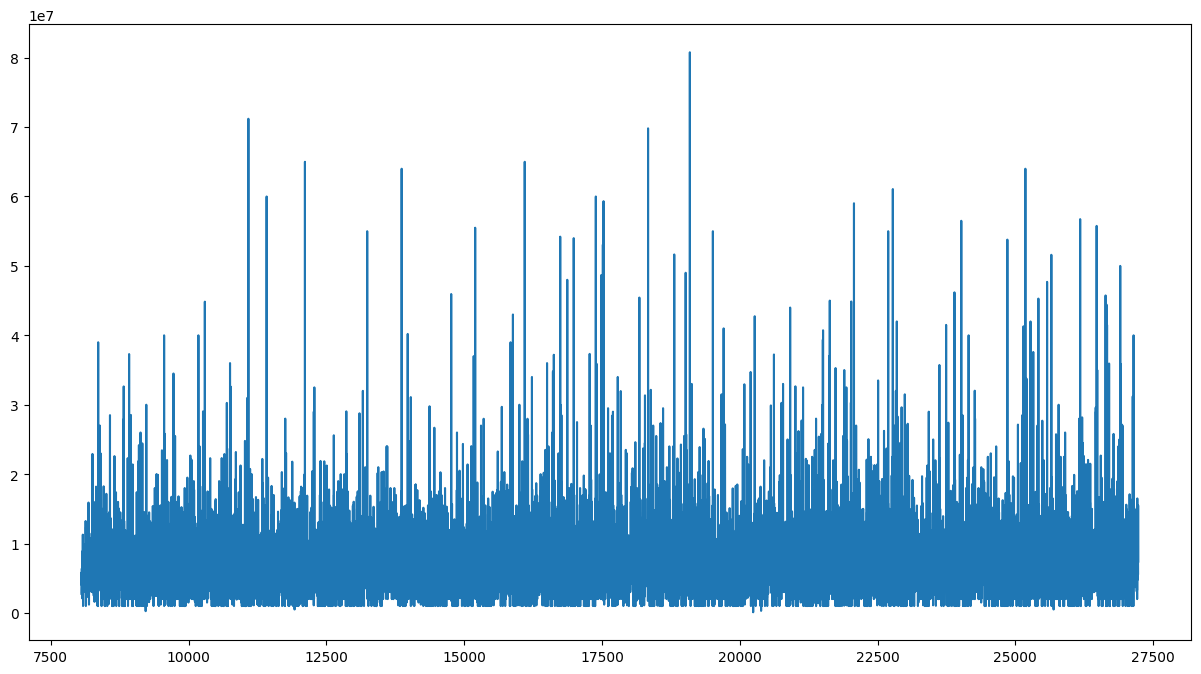

In [110]:
# Распределение значений целевой переменной до балансировки

plt.figure(figsize=(15, 8))
plt.plot(all_data_interpolated["price_doc"])

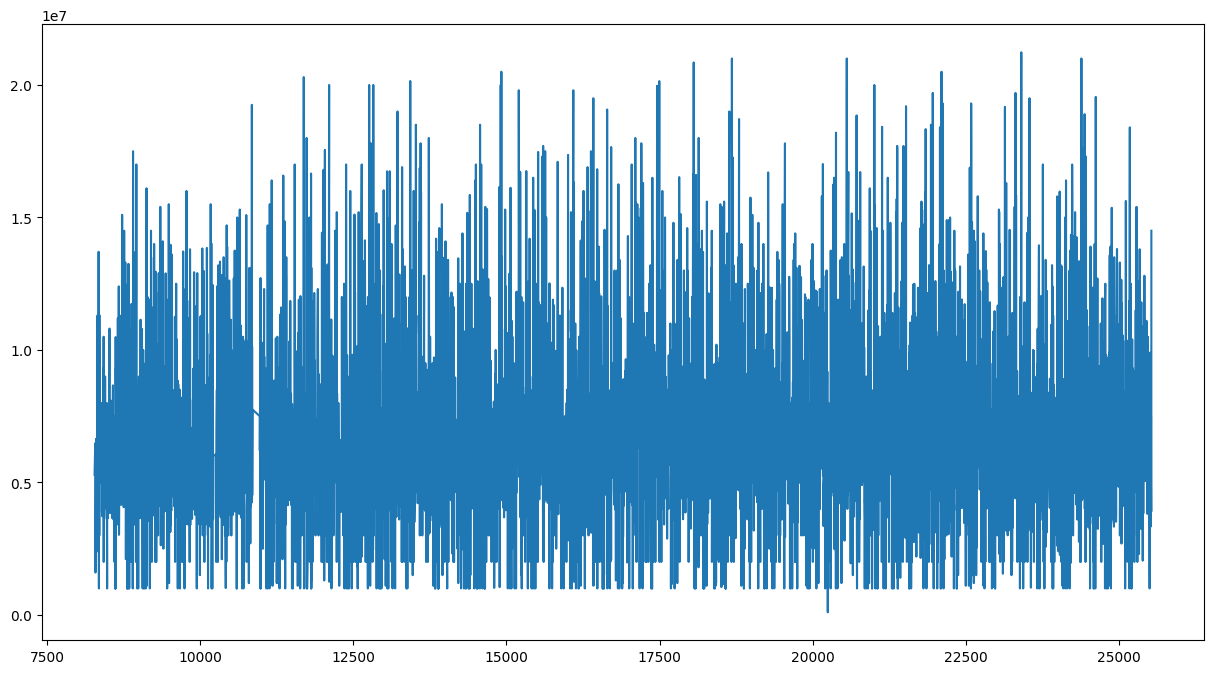

In [111]:
# Распределение значений целевой переменной после балансировки

plt.figure(figsize=(15, 8))
plt.plot(train_data["price_doc"])

Обучение модели

In [112]:
from sklearn.model_selection import train_test_split

X = train_data.drop(["price_doc", "id", "timestamp"], axis=1)
y = train_data["price_doc"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [113]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

In [114]:
forest.fit(X_train, y_train)

RandomForestRegressor()

In [115]:
forest.score(X_test, y_test)

0.5951588329947086

Визуализация признаков, которые влияют на целевую переменную сильнее всего

In [116]:
importances_df = pd.DataFrame({'Признак': X_train.columns, 'Важность': forest.feature_importances_})

importances_df = importances_df.sort_values(by='Важность', ascending=False)

importances_df

,Признак,Важность
0,full_sq,0.359498
211,cafe_count_2000,0.104571
124,workplaces_km,0.014845
265,cafe_count_5000_price_2500,0.010094
122,public_healthcare_km,0.009033
...,...,...
359,provision_retail_space_sqm,0.000000
364,museum_visitis_per_100_cap,0.000000
337,heating_share,0.000000
338,old_house_share,0.000000


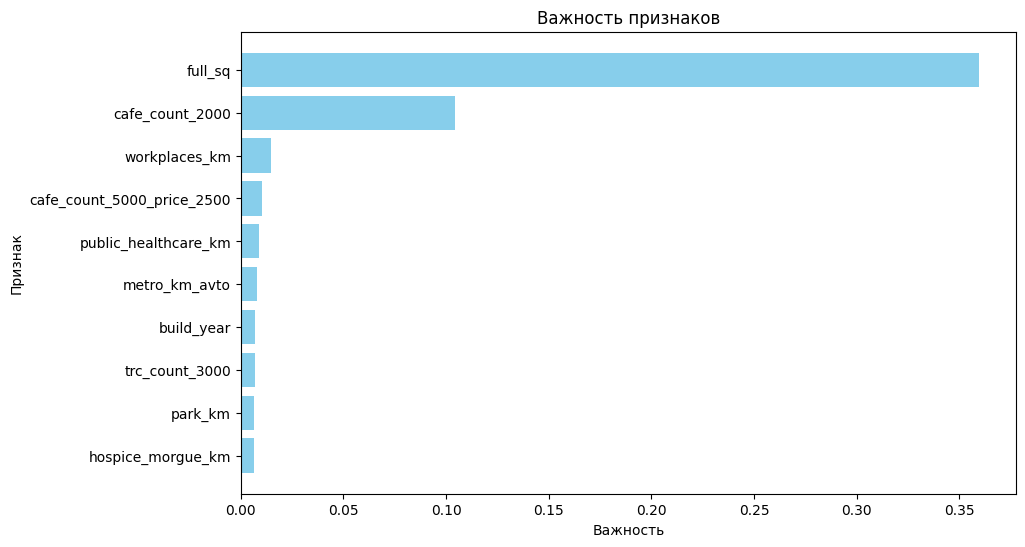

In [117]:
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Признак'][:10], importances_df['Важность'][:10], color='skyblue')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.title('Важность признаков')
plt.gca().invert_yaxis()
plt.show()

Статистики

In [118]:
#all_data

Сравнение с 2011 годом

In [119]:
filtered_data_2011 = all_data[(all_data['timestamp'] >= '2011-01-01') & (all_data['timestamp'] <= '2011-12-31')]
filtered_data_2011["build_year"].value_counts()
# Нет данных о возрасте здания для 2011 года

Series([], Name: build_year, dtype: int64)

In [120]:
filtered_data_2011["floor"].value_counts()
# В 2011 году чаще всего покупают недвижимость на 2 этаже или с 1 по 10 этажи, в Москве в 2023 большинство сделок также приходит на 1-10 этажи

2.0     87
4.0     76
3.0     74
1.0     70
5.0     68
9.0     54
7.0     53
8.0     53
6.0     37
10.0    34
11.0    27
12.0    21
14.0    16
16.0    16
15.0    15
17.0    12
13.0     8
18.0     4
22.0     4
24.0     3
20.0     3
19.0     2
21.0     1
23.0     1
26.0     1
25.0     1
Name: floor, dtype: int64

In [121]:
filtered_data_2011["num_room"].value_counts()
# Нет данных о количестве комнат недвижимости в 2011 году

Series([], Name: num_room, dtype: int64)

In [122]:
filtered_data_2011["sub_area"].value_counts()
# Самым частым районом при покупке недвижимости в 2011 году был район Богородское, а в 2023 - Чертаново Южное

Bogorodskoe                  20
Juzhnoe Butovo               17
Orehovo-Borisovo Severnoe    15
Perovo                       15
Kosino-Uhtomskoe             15
                             ..
Vnukovo                       2
Timirjazevskoe                2
Lomonosovskoe                 1
Gagarinskoe                   1
Zamoskvorech'e                1
Name: sub_area, Length: 116, dtype: int64

Сравнение с 2012 годом

In [123]:
filtered_data_2012 = all_data[(all_data['timestamp'] >= '2012-01-01') & (all_data['timestamp'] <= '2012-12-31')]
filtered_data_2012["build_year"].value_counts()
# Нет данных о возрасте здания в 2012 году

Series([], Name: build_year, dtype: int64)

In [124]:
filtered_data_2012["floor"].value_counts()
# В 2012 чаще всего покупают недвижимость на 3 этаже или с 1 по 10 этажи, в Москве в 2023 большинство сделок также приходит на 1-10 этажи

3.0     492
4.0     433
5.0     397
2.0     396
6.0     305
8.0     300
9.0     297
1.0     284
7.0     281
10.0    236
12.0    232
11.0    190
14.0    169
13.0    155
17.0    152
16.0    125
15.0    124
18.0     33
22.0     29
19.0     25
21.0     24
20.0     24
23.0     19
25.0     18
24.0     11
32.0      5
27.0      3
29.0      2
26.0      2
0.0       2
30.0      1
44.0      1
Name: floor, dtype: int64

In [125]:
filtered_data_2012["num_room"].value_counts()
# Нет данных о количестве комнат недвижимости в 2012 году

Series([], Name: num_room, dtype: int64)

In [126]:
filtered_data_2012["sub_area"].value_counts()
# Самым частым районом при покупке недвижимости в 2012 году было поселение Сосенское, а в 2023 - район Чертаново Южное

Poselenie Sosenskoe        338
Poselenie Voskresenskoe    242
Poselenie Vnukovskoe       165
Nekrasovka                 138
Poselenie Moskovskij       121
                          ... 
Poselenie Marushkinskoe      1
Poselenie Shhapovskoe        1
Poselenie Rjazanovskoe       1
Poselenie Kokoshkino         1
Vostochnoe                   1
Name: sub_area, Length: 139, dtype: int64

Сравнение с 2013 годом

In [127]:
filtered_data_2013 = all_data[(all_data['timestamp'] >= '2013-01-01') & (all_data['timestamp'] <= '2013-12-31')]
filtered_data_2013["build_year"].value_counts()
# В большинстве сделок 2013 года была недвижимость 2013 года постройки, в 2023 году — недвижимость 2020-х годов постройки

2013.0        223
2014.0         90
1966.0         88
1974.0         86
1960.0         86
             ... 
3.0             1
1933.0          1
20052009.0      1
1938.0          1
1926.0          1
Name: build_year, Length: 97, dtype: int64

In [128]:
filtered_data_2013["floor"].value_counts()
# В 2013 году чаще всего покупают недвижимость на 5 этаже или с 1 по 10 этаж, в Москве сделок также приходит на 1-10 этажи в 2023 большинство

5.0     721
3.0     708
2.0     678
4.0     651
7.0     532
9.0     506
6.0     500
1.0     498
8.0     474
12.0    342
10.0    319
11.0    312
14.0    268
16.0    259
17.0    259
13.0    254
15.0    229
20.0     58
18.0     57
22.0     55
19.0     55
25.0     39
24.0     39
21.0     34
23.0     31
30.0      5
27.0      3
32.0      3
28.0      1
38.0      1
34.0      1
33.0      1
26.0      1
37.0      1
Name: floor, dtype: int64

In [129]:
''' Наибольшим спросом в 2013 году пользоволась 2-х комнатная недвижимость, в 2023 году идентично - 2-х комнатные квартиры (за исключением
некторых районов, там наибольший спрос на 1 комнатную недвижимость был наибольшим) '''
filtered_data_2013["num_room"].value_counts()

2.0     1610
1.0     1448
3.0      852
4.0       73
5.0        9
0.0        3
6.0        2
19.0       1
Name: num_room, dtype: int64

In [130]:
filtered_data_2013["sub_area"].value_counts()
# Самым частым районом при покупке недвижимости в 2013 году был район Некрасовка, а в 2023 - район Чертаново Южное

Nekrasovka                   802
Poselenie Sosenskoe          619
Poselenie Voskresenskoe      290
Mitino                       273
Poselenie Moskovskij         269
                            ... 
Poselenie Novofedorovskoe      2
Poselenie Voronovskoe          2
Poselenie Klenovskoe           1
Poselenie Rogovskoe            1
Poselenie Marushkinskoe        1
Name: sub_area, Length: 142, dtype: int64

Сравнение с 2014 годом

In [131]:
filtered_data_2014 = all_data[(all_data['timestamp'] >= '2014-01-01') & (all_data['timestamp'] <= '2014-12-31')]
filtered_data_2014["build_year"].value_counts()
# В большинстве сделок 2014 года была недвижимость 2014 года постройки, в 2023 году — недвижимость 2020-х годов постройки

2014.0    788
2015.0    457
0.0       314
1970.0    290
1969.0    286
         ... 
4965.0      1
1914.0      1
1943.0      1
1860.0      1
1691.0      1
Name: build_year, Length: 110, dtype: int64

In [132]:
filtered_data_2014["floor"].value_counts()
# В 2014 году чаще всего покупают недвижимость на 3 этаже или с 1 по 10 этажи, в Москве в 2023 большинство сделок также приходит на 1-10 этажи

3.0     1416
2.0     1355
5.0     1249
4.0     1183
1.0      977
7.0      875
6.0      848
9.0      818
8.0      809
12.0     592
10.0     586
11.0     585
14.0     453
13.0     402
16.0     326
17.0     302
15.0     293
19.0     111
18.0     100
20.0      73
22.0      70
21.0      66
23.0      59
24.0      41
25.0      36
26.0       8
0.0        7
32.0       6
28.0       5
31.0       5
36.0       1
34.0       1
41.0       1
77.0       1
27.0       1
29.0       1
Name: floor, dtype: int64

In [133]:
''' Наибольшим спросом в 2014 году пользоволась 2-х комнатная недвижимость, в 2023 году идентично - 2-х комнатные квартиры (за исключением
некторых районов, там наибольший спрос на 1 комнатную недвижимость был наибольшим) '''
filtered_data_2014["num_room"].value_counts()

2.0     5271
1.0     5058
3.0     3025
4.0      262
5.0       27
0.0       10
6.0        4
8.0        2
10.0       1
7.0        1
17.0       1
Name: num_room, dtype: int64

In [134]:
filtered_data_2014["sub_area"].value_counts()
# Самым частым районом при покупке недвижимости в 2014 было поселение Внуковское, а в 2023 - район Чертаново Южное

Poselenie Vnukovskoe              729
Nekrasovka                        604
Poselenie Sosenskoe               569
Poselenie Moskovskij              425
Tverskoe                          310
                                 ... 
Poselenie Kievskij                  2
Molzhaninovskoe                     2
Vostochnoe                          2
Poselenie Mihajlovo-Jarcevskoe      1
Poselenie Shhapovskoe               1
Name: sub_area, Length: 145, dtype: int64

Сравнение с 2015 годом

In [135]:
filtered_data_2015 = all_data[(all_data['timestamp'] >= '2015-01-01') & (all_data['timestamp'] <= '2015-12-31')]
filtered_data_2015["build_year"].value_counts()
# В большинстве сделок 2015 года была недвижимость 2015 года постройки, в 2023 году — недвижимость 2020-х годов постройки

2015.0    311
0.0       177
2016.0    172
2017.0    108
2013.0     56
         ... 
2018.0      1
1929.0      1
215.0       1
71.0        1
1931.0      1
Name: build_year, Length: 90, dtype: int64

In [136]:
filtered_data_2015["floor"].value_counts()
# В 2015 чаще всего покупают недвижимость на 2 этаже или с 1 по 10 этаж, в Москве в 2023 большинство сделок также приходит на 1-10 этажи

2.0     358
3.0     338
5.0     317
4.0     266
7.0     225
8.0     194
6.0     188
1.0     173
9.0     168
12.0    154
11.0    148
10.0    132
13.0     99
14.0     95
15.0     86
16.0     85
17.0     70
18.0     37
20.0     22
19.0     19
23.0     15
22.0     15
21.0     13
25.0     10
24.0      6
26.0      2
34.0      1
37.0      1
36.0      1
44.0      1
Name: floor, dtype: int64

In [137]:
''' Наибольшим спросом в 2015 пользоволась 2-х комнатная недвижимость, в 2023 году идентично - 2-х комнатные квартиры (за исключением
некторых районов, там наибольший спрос на 1 комнатную недвижимость был наибольшим) '''
filtered_data_2015["num_room"].value_counts()

2.0     1251
1.0     1096
3.0      798
4.0       83
5.0        4
6.0        3
0.0        1
9.0        1
10.0       1
8.0        1
Name: num_room, dtype: int64

In [138]:
filtered_data_2015["sub_area"].value_counts()
# Самым частым районом при покупке недвижимости в 2015 было поселение Внуковское, а в 2023 - Чертаново Южное

Poselenie Vnukovskoe         308
Poselenie Sosenskoe          250
Tverskoe                     118
Poselenie Moskovskij         110
Nagatinskij Zaton             98
                            ... 
Severnoe                       1
Molzhaninovskoe                1
Poselenie Kokoshkino           1
Poselenie Krasnopahorskoe      1
Kapotnja                       1
Name: sub_area, Length: 140, dtype: int64